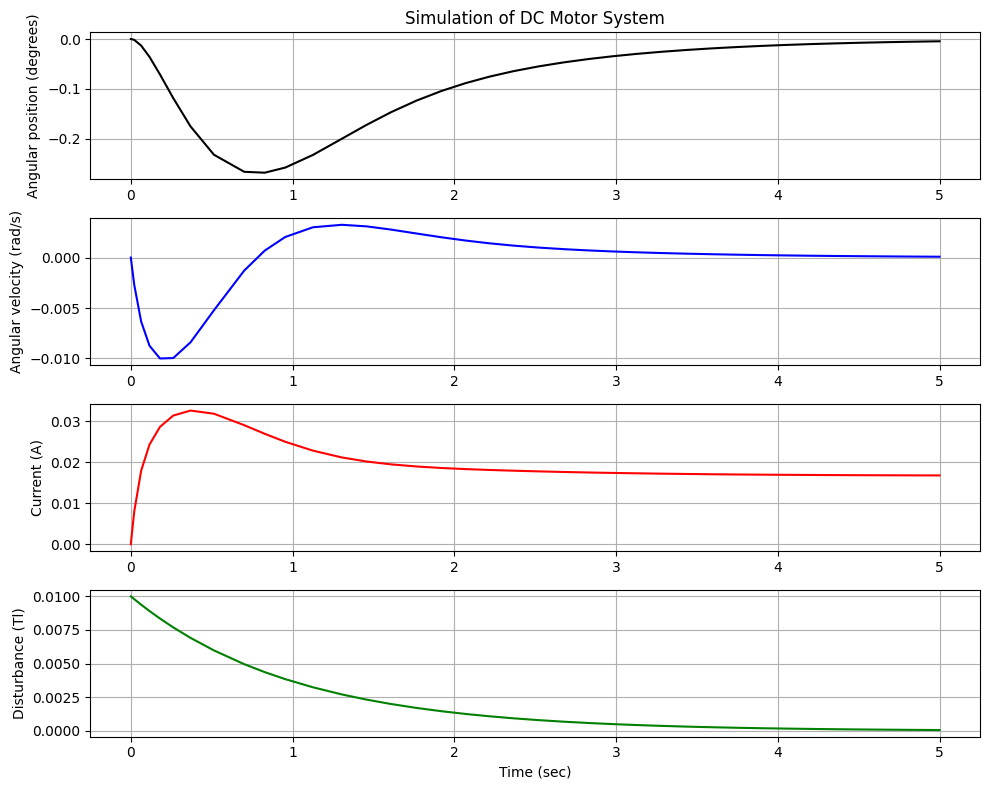

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def DC_motor_w(t, x):
    # System matrices
    A = np.array([[0, 1, 0, 0],
                  [0, 0, 4.438, -7.396],
                  [0, -12, -24, 0],
                  [0, 0, 0, -1]])

    B = np.array([[0, 0],
                  [0, -7.396],
                  [20, 0],
                  [0, 0]])

    k = np.array([3.0000, 0.8796, 0.1529, -1.8190])

    # Desired angular position and disturbance
    theta_d = 0
    Tl = 0.01

    # Control law
    v1 = 2.255 * Tl - k[0] * (x[0] - theta_d) - k[1] * x[1] - k[2] * x[2]
    u = np.array([v1, Tl])

    # State derivative
    xp = np.dot(A, x) + np.dot(B, u)

    return xp

# Initial conditions
x0 = np.array([0, 0, 0, 0.01])  # Initial state [theta, omega, i, Tl]

# Time span
tspan = (0, 5)

# Solve the ODE
sol = solve_ivp(DC_motor_w, tspan, x0, method='RK45', dense_output=True)

# Extract results
t = sol.t
x_theta = sol.y[0]
x_omega = sol.y[1]
x_i = sol.y[2]
Tl = sol.y[3]

# Plotting
plt.figure(figsize=(10, 8))

plt.subplot(4, 1, 1)
plt.plot(t, x_theta * 180 / np.pi, 'k')
plt.grid(True)
plt.ylabel('Angular position (degrees)')
plt.title('Simulation of DC Motor System')

plt.subplot(4, 1, 2)
plt.plot(t, x_omega, 'b')
plt.grid(True)
plt.ylabel('Angular velocity (rad/s)')

plt.subplot(4, 1, 3)
plt.plot(t, x_i, 'r')
plt.grid(True)
plt.ylabel('Current (A)')

plt.subplot(4, 1, 4)
plt.plot(t, Tl, 'g')
plt.grid(True)
plt.xlabel('Time (sec)')
plt.ylabel('Disturbance (Tl)')

plt.tight_layout()
plt.show()
